In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler

In [23]:
data_path = "C:\\Users\\PRIYANKA\\Documents\\IPL\\Capstone\\Data Science techniques\\_Data Set - student-mat.csv"
df = pd.read_csv(data_path)
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0


# The original dataset has 33 columns and 999 rows 

In [5]:
df.shape

(999, 33)

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Splitting the data based on gender

In [7]:
sex = df.groupby('sex')

In [8]:
boys = sex.get_group('M')
girls = sex.get_group('F')

# Chi squared test is used because the data is qualitative (categories of male and female) and also quantitative (scores from columns G1, G2 and G3) and many data types are 'object' and not 'integer'. 
gender vs g (separately)

In [9]:
G_data = df[['G1', 'G2', 'G3']]
G_data.head()

,G1,G2,G3
0,5.0,6.0,6.0
1,5.0,5.0,6.0
2,7.0,8.0,10.0
3,15.0,14.0,15.0
4,6.0,10.0,10.0


In [10]:
all_data = G_data/len(G_data)
all_data.head()

,G1,G2,G3
0,0.005005,0.006006,0.006006
1,0.005005,0.005005,0.006006
2,0.007007,0.008008,0.010010
3,0.015015,0.014014,0.015015
4,0.006006,0.010010,0.010010


In [11]:
girls_g = girls[['G1', 'G2', 'G3']]

In [12]:
expected = all_data*len(girls_g)

In [13]:
chi_stat = (((girls_g - expected)**2)/expected).sum()
print(chi_stat)

G1    6651.504047
G2    6506.971592
G3    6241.995423
dtype: float64


# The 'df' (degrees of freedom) will be 1 because there are 2 categories (male and female). df is 1 minus the total categories
# The significance level is 0.95 because it is one tailed test

In [14]:
crit = stats.chi2.ppf(q = 0.95, df = 1)
print("Critical value", crit)

Critical value 3.841458820694124


In [15]:
p_value = 1 - stats.chi2.cdf(x = chi_stat, df = 1)
print("P Value", p_value)

P Value [0. 0. 0.]


# Chi squared stat is: G1: 940.196215, G2: 919.766419, G3: 882.311794
# Critical value is: 3.84
# P value is: 0 
# Chi Squared stat exceeds the critical value. Hence we reject the null hypothesis that girls are not good at math as compared to boys
Paired t test

The Formula 'stats.chisquare' cant be used because the rows of girls and rows of boys are not equal. There are no missing values in each column

In [16]:
observed_freq = np.array(girls_g)
boys_g = boys[['G1', 'G2', 'G3']]
expected_freq = np.array(boys_g)

chi2_statistic, p_value = stats.chisquare(f_obs=observed_freq, f_exp=expected_freq)

# Using Pearsons Corr on G1, G2 and G3 only

In [17]:
G_data.corr()

,G1,G2,G3
G1,1.000000,0.852118,0.801468
G2,0.852118,1.000000,0.904868
G3,0.801468,0.904868,1.000000


In [18]:
threshold = 0.7
highly_corrcols = np.where(G_data > threshold)
to_drop = []
for i in range(len(df.columns)):
    for j in range(i+1,len(df.columns)):
        if highly_corrcols[0][i] == highly_corrcols[1][j]:
            to_drop.append(df.columns[j])
new_df = df.drop(to_drop, axis = 1)
print(new_df)

    school  sex   age Pstatus
0       GP    F  18.0       A
1       GP    F  17.0       T
2       GP    F  15.0       T
3       GP    F  15.0       T
4       GP    F  16.0       T
..     ...  ...   ...     ...
994    NaN  NaN   NaN     NaN
995    NaN  NaN   NaN     NaN
996    NaN  NaN   NaN     NaN
997    NaN  NaN   NaN     NaN
998    NaN  NaN   NaN     NaN

[999 rows x 4 columns]


# The original dataframe's shape was (395,33). All highly correlated columns are dropped and only 3 independent variables are retained: "School", "Sex" and "Age". Hence, we can say that the scores school, sex and age are independent of scores "G1", "G2" and "G3"

In [19]:
new_df.shape

(999, 4)

# Box and Whiskers for scores (G1, G2 and G3)

[]

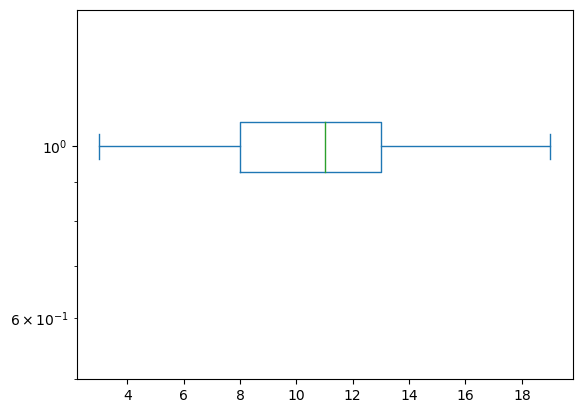

In [20]:
G_data['G1'].plot(kind='box',vert=False);
plt.semilogy()

[]

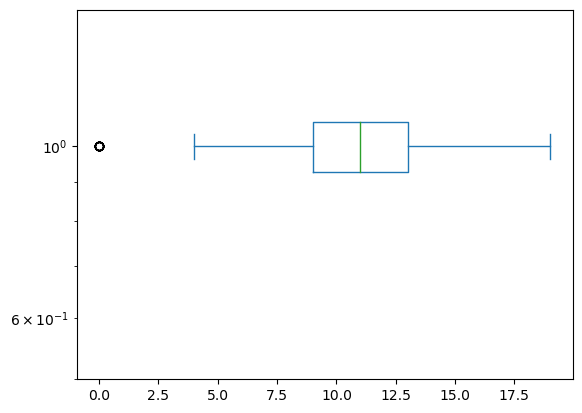

In [21]:
G_data['G2'].plot(kind='box',vert=False);
plt.semilogy()

[]

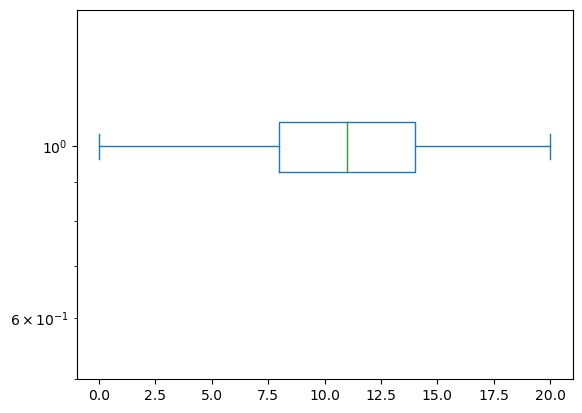

In [22]:
G_data['G3'].plot(kind='box',vert=False);
plt.semilogy()